# 2023-02-24

# Image Classification

In [2]:
import tensorflow as tf

data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

print(X_train.shape)   # 흑백이미지 60000개가 28 x 28 size
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


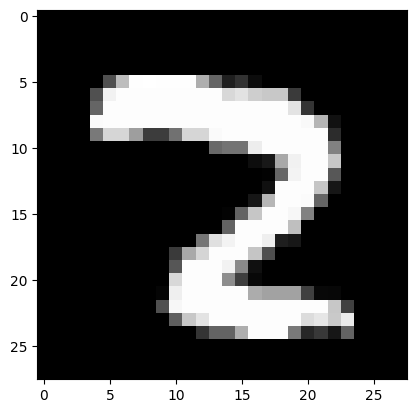

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[28], cmap = plt.get_cmap('gray'))

In [11]:
 # array형태의 데이터를 np.unique로 class 갯수 확인

import numpy as np

np.unique(y_train)   

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 데이터 전처리

In [12]:
# 0 ~ 255의 컬러 값을 0 ~ 1값을 가지는 데이터로 변환하기 (정규화)

X_train = X_train / 255.0
X_test = X_test / 255.0

### Non CNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28, 28)))       # X_train의 데이터 size
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))      # output이 확률(0~1값)값을 가지는 10개의 데이터로 나옴 (1에 가까울 수록 높은 수가 나옴)

In [15]:
# loss = 다중 분류/ target=integer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2172 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0937 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0642 - accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9875


In [19]:
# 모델평가

model.evaluate(X_test, y_test)    # loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9753


[0.08454246073961258, 0.9753000140190125]

In [20]:
# 예측

result = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
X_test.shape

(10000, 28, 28)

In [23]:
result.shape

(10000, 10)

In [27]:
sample = result[0]

print(np.argmax(sample))    # 예측 결과의 index
print(y_test[0])           # 실제 값

7
7


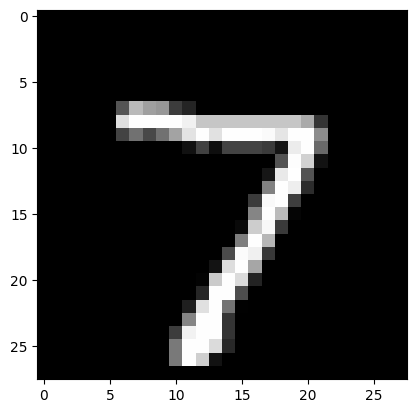

In [28]:
# 실제 값

plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))

## Flatten Dropout Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape = (28, 28)))       
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3125 - accuracy: 0.9059
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1480 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1149 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0932 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0801 - accuracy: 0.9759


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9732


[0.09009195119142532, 0.9732000231742859]

## CNN Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))           # layer의 갯수, filter size,,,
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.1189 - accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0156 - accuracy: 0.9951


In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0273 - accuracy: 0.9909


[0.027282821014523506, 0.9908999800682068]

In [ ]:
# Flatten : 0.9875(train) / 0.9753(test)
# Flatten(Dropout) : 0.9759(train) / 0.9732(test)          -> train과 test의 격차가 줄었다.
# CNN : 0.9951 (train) / 0.9908(test)

## CNN 

- LeNet
- AlexNet
- VGG-16

## Data Augmentation